<a href="https://colab.research.google.com/github/akshat3196/final_project_2020Sp/blob/master/Final_Project_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project IS 590_PR_Spring

##Data Source 1: Drug Consumption data of 1885 *correspondents*

## *Source and Copyrights*

Source: UCI Machine Learning Repository

Link: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Copyrights: Data was donated to the UCI repository on 17-10-2016 and can be used for academic purposes.

## *Data Description*
Database contains records for 1885 respondents. Each respondent contains some attributes like level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs like alcohol cannabis, chocolate, cocaine, caffeine, LSD etc. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

##Data Source 2: World Wide alcohol consumption per person in an year

## *Data Description*
This dataset contains data for alcohol consumption of a single person in an year for all 228 countries. It has no null values and has four columns.

## *Source and Copyrights*

Source: Our world in data

Link: https://ourworldindata.org/alcohol-consumption

Copyrights: Hannah Ritchie and Max Roser (2020) - "Alcohol Consumption". Published online at OurWorldInData.org.

## Hypotheses Testing
1.  Is there any positive correlation between Cannabis consumption and consumption of hard drugs, or these two variables are independent of each other?

2. In 3 countries who top alcohol consumption, majority of the heavy drinkers are whites.


3.  People who consume nicotine, also consume alcohol regularly.

In [0]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from google.colab import files

In [129]:
data_file1 = files.upload()

Saving total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv to total-alcohol-consumption-per-capita-litres-of-pure-alcohol (1).csv


In [130]:
data_file2 = files.upload()

Saving drug_consumption.data to drug_consumption (1).data


In [0]:
# round_value(intermediate_df,'Alcohol_consumption_per_person_yearly(ltr)',1)

### Preprocessing of the worldwide alcohol consumption file

In [0]:
# Loading the data as a DataFrame
alcohol_consumption = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')

In [0]:
# Renaming Columns
alcohol_consumption.columns = ['Country',
 'Code',
 'Year',
 'Alcohol_consumption_per_person_yearly(ltr)']

In [136]:
# Data Dimensionality
alcohol_consumption.shape

(228, 4)

In [138]:
# Verifying no null values
alcohol_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     228 non-null    object 
 1   Code                                        182 non-null    object 
 2   Year                                        228 non-null    int64  
 3   Alcohol_consumption_per_person_yearly(ltr)  228 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.2+ KB


In [58]:
# Number of countries in the dataset
alcohol_consumption['Country'].nunique()

228

In [139]:
#Checking datatypes of the columns
alcohol_consumption.dtypes

Country                                        object
Code                                           object
Year                                            int64
Alcohol_consumption_per_person_yearly(ltr)    float64
dtype: object

In [0]:
# We will store the mean alcohol consumption of the remaining countries in "Others" category
other_country_alcohol_consumption_mean = alcohol_consumption[~alcohol_consumption['Country'].isin(['United Kingdom','United States','Canada','Australia','Ireland','New Zealand'])]['Alcohol_consumption_per_person_yearly(ltr)'].mean()

In [0]:
#Defining a function to round column values
 def round_value(dataframe, column_name,digit_count):
   dataframe[column_name] = round(dataframe[column_name],digit_count)

In [0]:
# Taking the alcohol consumption of countries which are present in our drug consumption data
intermediate_df = alcohol_consumption[alcohol_consumption['Country'].isin(['United Kingdom','United States','Canada','Australia','Ireland','New Zealand'])][['Country','Alcohol_consumption_per_person_yearly(ltr)']]

In [157]:
# Concatenating "Other" option 
# concat_array = pd.Series(['Other',round(other_country_alcohol_consumption_mean,2)])
concat_dict = {'Country':'Other',"Alcohol_consumption_per_person_yearly(ltr)":round(other_country_alcohol_consumption_mean,2)}
intermediate_df2 = pd.DataFrame(concat_dict,index = [6])
intermediate_df = pd.concat([intermediate_df,intermediate_df2])
intermediate_df.reset_index(drop=True,inplace=True)
intermediate_df

,Country,Alcohol_consumption_per_person_yearly(ltr)
0,Australia,10.60
1,Canada,8.90
2,Ireland,13.00
3,New Zealand,10.70
4,United Kingdom,11.40
5,United States,9.80
6,Other,6.12


### Preprocessing of the drug consumption file

In [0]:
#importing data file
df_raw = pd.read_csv('drug_consumption.data',header = None)

In [159]:
#Data Dimensionality
df_raw.shape

(1885, 32)

It was mentioned in the data description that the study took responses from 1886 participants, and we can verify that by looking at the shape of dataframe. It has 1885 rows, as expected.

In [160]:
#Checking for null values in the data and observing column data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1885 non-null   int64  
 1   1       1885 non-null   float64
 2   2       1885 non-null   float64
 3   3       1885 non-null   float64
 4   4       1885 non-null   float64
 5   5       1885 non-null   float64
 6   6       1885 non-null   float64
 7   7       1885 non-null   float64
 8   8       1885 non-null   float64
 9   9       1885 non-null   float64
 10  10      1885 non-null   float64
 11  11      1885 non-null   float64
 12  12      1885 non-null   float64
 13  13      1885 non-null   object 
 14  14      1885 non-null   object 
 15  15      1885 non-null   object 
 16  16      1885 non-null   object 
 17  17      1885 non-null   object 
 18  18      1885 non-null   object 
 19  19      1885 non-null   object 
 20  20      1885 non-null   object 
 21  21      1885 non-null   object 
 22  

As we can see the non-null count for every column is same the row count of the dataframe so we can conclude that there is no null values in the data. As a result we need not handle the null values.

In [0]:
#I would be taking x number of columns for my final project
df = df_raw[[1,2,3,4,5,13,17,18,19,20,21,23,26,28,29]]

As proposed on Moodle, I would be using only a subset of attributes provided in the original data. I would be using some attributes of participants of the study, which will be Age, Gender, Education Level, Country,and Ethnicity. I would be taking some of the common drugs which are used like Alcohol, Caffeine, Cannabis, Cocaine etc

In [0]:
#Making an header list as DataFrame has no headers
header_list = ['Age','Gender','Education','Country','Ethnicity','Alcohol','Caffeine','Cannabis','Chocolate','Cocaine','Crack','Heroin','LSD','Mushroom','Nicotine']

In [0]:
#Assigning header names
df.columns = header_list

In [164]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol',
       'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Heroin',
       'LSD', 'Mushroom', 'Nicotine'],
      dtype='object')

In [165]:
#Taking a look on data types of the columns
df.dtypes

Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Alcohol       object
Caffeine      object
Cannabis      object
Chocolate     object
Cocaine       object
Crack         object
Heroin        object
LSD           object
Mushroom      object
Nicotine      object
dtype: object

In [166]:
df

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.12600,CL5,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,CL5,CL6,CL4,CL6,CL3,CL0,CL0,CL2,CL0,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,CL6,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL1,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,CL4,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL0,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,CL4,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL2,CL2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,CL5,CL4,CL5,CL4,CL0,CL0,CL0,CL3,CL0,CL0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,CL5,CL5,CL3,CL4,CL0,CL0,CL0,CL5,CL4,CL5
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,CL4,CL6,CL6,CL6,CL4,CL0,CL0,CL2,CL2,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,CL5,CL6,CL6,CL5,CL0,CL0,CL0,CL3,CL3,CL4


This is the final dataframe, which I would be working on. But the values of columns in this dataframe doesn't make much sense. This is because we have to replace these values by categories which is mentioned in the data source.

In [0]:
def to_str(column_name):
  df[column_name] = df[column_name].astype(str)
pd.options.mode.chained_assignment = None
for x in ['Age','Gender','Ethnicity','Education','Country']:
  to_str(x)

In [168]:
df.dtypes

Age          object
Gender       object
Education    object
Country      object
Ethnicity    object
Alcohol      object
Caffeine     object
Cannabis     object
Chocolate    object
Cocaine      object
Crack        object
Heroin       object
LSD          object
Mushroom     object
Nicotine     object
dtype: object

We earlier saw the data types of all the columns, here we would convert the columns of float datatype into string datatype

In [0]:
#Defining dictionaries which will be used in replace function
age_dict = {'-0.9519700000000001':'18-24','-0.07854':'25-34','0.49788000000000004':'35-44','1.09449':'45-54','1.82213':'55-64','2.59171':'65+'}
gender_dict = {'0.48246000000000006':'Female','-0.48246000000000006':'Male'}
education_dict = {'-0.059210000000000006':'Professional Certificate/Diploma', '1.98437':'Doctrate Degree', '1.16365':"Master's Degree", '-1.22751':'Left school at 18',
       '-1.7379':'Left school at 16 years', '0.45468000000000003':'University degree', '-0.6111300000000001':'Enrolled in University/College',
       '-2.43591': 'Left school before 16 years', '-1.43719':' Left school at 17 years'}
country_dict = {'0.9608200000000001':'United Kingdom', '0.24923':'Canada', '-0.57009':'United States', '-0.28519':'Other',
       '-0.09765':'Australia', '0.21128000000000002':'Ireland', '-0.46841000000000005':'New Zealand'}
ethnicity_dict = {'0.126':'Mixed-White/Asian', '-0.31685':'White', '0.1144':'Other', '-0.22166':'Mixed-White/Black', '-0.50212':'Asian','-1.1070200000000001':'Black', '1.90725':' Mixed-Black/Asian'}
drug_dict = {'CL0':'Never Used', 'CL2':'Used in Last Decade', 'CL1':'Used over a Decade Ago', 'CL3':'Used in Last Year', 'CL4':'Used in Last Month', 'CL5':'Used in Last Week', 'CL6':'Used in Last Day'}

In [0]:
#Replacing the orignal values of the dataframe by values in the dictionaries

def replace_val(column_name,dict_name):
  df[column_name].replace(dict_name, inplace = True)

pd.options.mode.chained_assignment = None

for x,y in zip(['Age','Gender','Country','Ethnicity','Education'],[age_dict,gender_dict,country_dict,ethnicity_dict,education_dict]):
  replace_val(x,y)

for x in ['Alcohol','Caffeine','Cannabis','Chocolate','Cocaine','Crack','Heroin','LSD','Mushroom','Nicotine']:
  replace_val(x,dict_name=drug_dict)


In [171]:
df

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
0,35-44,Female,Professional Certificate/Diploma,United Kingdom,Mixed-White/Asian,Used in Last Week,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade
1,25-34,Male,Doctrate Degree,United Kingdom,White,Used in Last Week,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Never Used,Used in Last Decade,Never Used,Used in Last Month
2,35-44,Male,Professional Certificate/Diploma,United Kingdom,White,Used in Last Day,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used
3,18-24,Female,Master's Degree,United Kingdom,White,Used in Last Month,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade
4,35-44,Female,Doctrate Degree,United Kingdom,White,Used in Last Month,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Used in Last Decade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,Female,Enrolled in University/College,United States,White,Used in Last Week,Used in Last Month,Used in Last Week,Used in Last Month,Never Used,Never Used,Never Used,Used in Last Year,Never Used,Never Used
1881,18-24,Male,Enrolled in University/College,United States,White,Used in Last Week,Used in Last Week,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Used in Last Week,Used in Last Month,Used in Last Week
1882,25-34,Female,University degree,United States,White,Used in Last Month,Used in Last Day,Used in Last Day,Used in Last Day,Used in Last Month,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Used in Last Day
1883,18-24,Female,Enrolled in University/College,United States,White,Used in Last Week,Used in Last Day,Used in Last Day,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Year,Used in Last Year,Used in Last Month


## Population classification according to different attributes

In [0]:
#Defining a function which returns value counts for dataframe column

def value_percentage(dataframe,column_name):
  return dataframe[column_name].value_counts(normalize = True)


In [0]:
#Defining a function which returns a pie chart value counts for dataframe column

def value_percentage_chart(dataframe,column_name):
  dataframe[column_name].value_counts(normalize = True).plot.pie(figsize=(8, 8),autopct='%1.1f%%')

In [227]:
value_percentage(df,'Education')

Enrolled in University/College      0.268435
University degree                   0.254642
Master's Degree                     0.150133
Professional Certificate/Diploma    0.143236
Left school at 18                   0.053050
Left school at 16 years             0.052520
Doctrate Degree                     0.047215
 Left school at 17 years            0.015915
Left school before 16 years         0.014854
Name: Education, dtype: float64

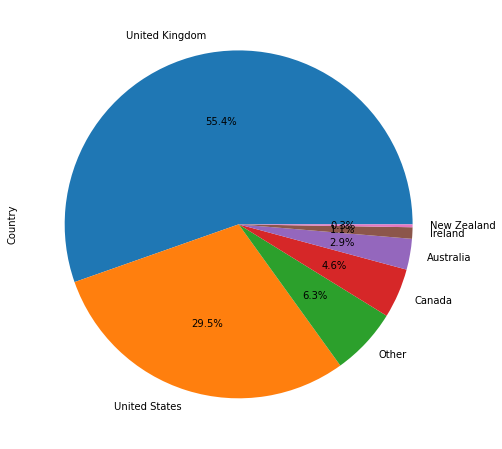

In [228]:
value_percentage_chart(df,'Country')

From this pie chart we can see that more than half of the respondents are form the United Kingdom which makes sense as the data was donated by the Professors working in the University of Nottingham.

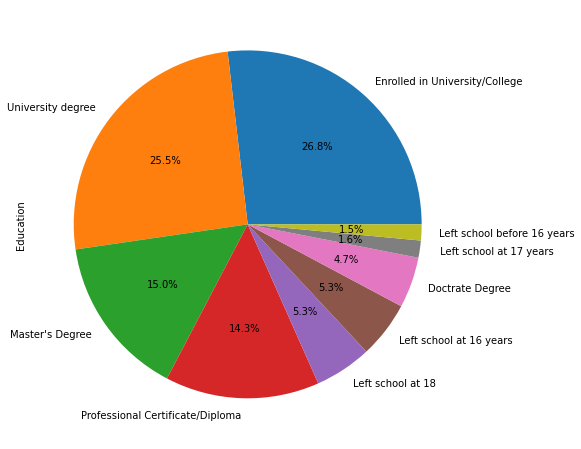

In [229]:
value_percentage_chart(df,'Education')

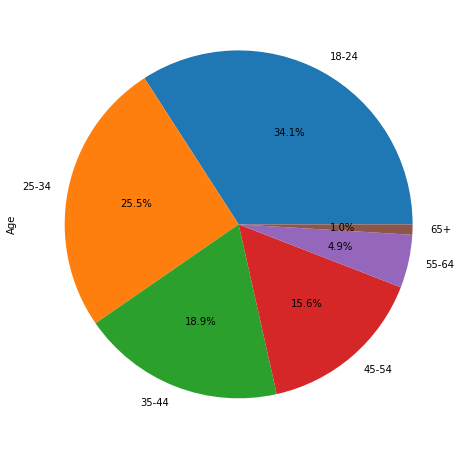

In [230]:
value_percentage_chart(df,'Age')

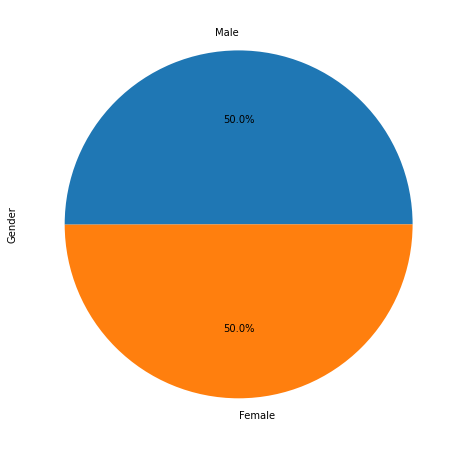

In [231]:
value_percentage_chart(df,'Gender')

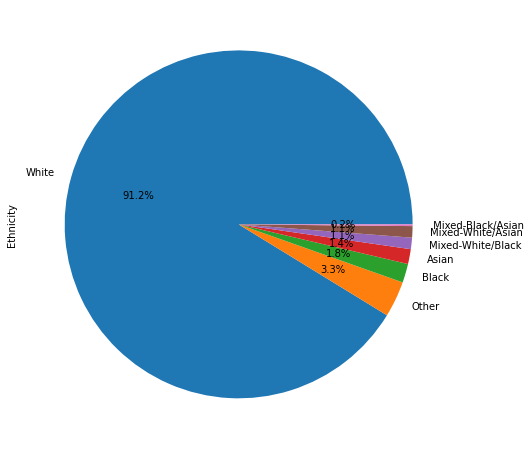

In [232]:
value_percentage_chart(df,'Ethnicity')

In [0]:
def count_plot(dataframe,column_name):
  ax = sns.countplot(dataframe[column_name])
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=20,
      horizontalalignment='right'
  )

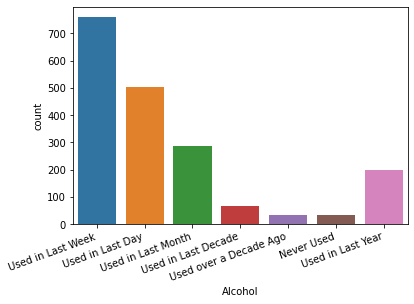

In [234]:
count_plot(df,'Alcohol')

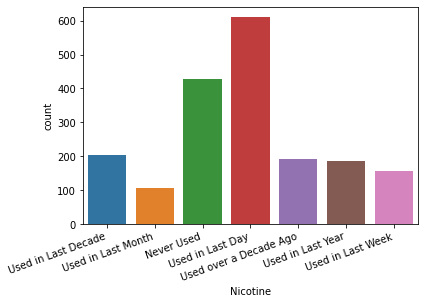

In [235]:
count_plot(df,'Nicotine')

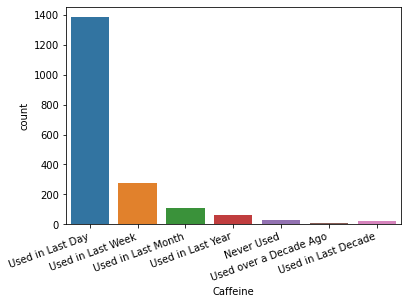

In [236]:
count_plot(df,'Caffeine')

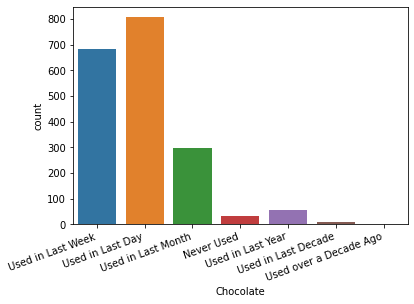

In [237]:
count_plot(df,'Chocolate')

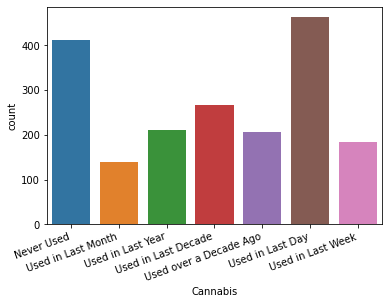

In [238]:
count_plot(df,'Cannabis')

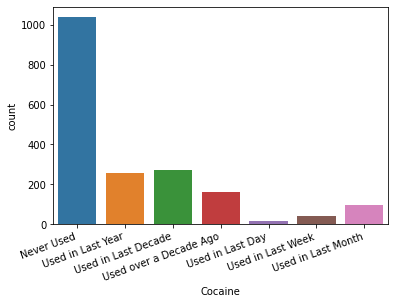

In [239]:
count_plot(df,'Cocaine')

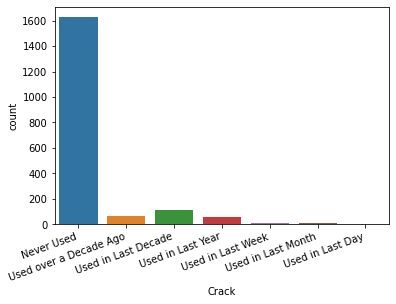

In [240]:
count_plot(df,'Crack')

From the above histogram we can see that people consume legal drugs such as Alcohol, Caffeine and Chocolate on a more regular basis than they have consumed illegal drugs such as Crack, Cocaine, LSD.

### Hypothesis 1:
Is there any positive correlation between Cannabis consumption and consumption of hard drugs, or these two variables are independent of each other?

In [0]:
#Changing the data type of columns to 'category' in order to find the correlation
column_list = df.columns.to_list()
df1 = pd.DataFrame()
pd.options.mode.chained_assignment = None
def category_type(column_name):
  df1[column_name] = df[column_name].astype('category').cat.codes

for x in column_list:
  category_type(x)

In [242]:
#Categorical DataFarame
df1

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
0,2,0,7,5,3,4,1,0,4,0,0,0,0,0,2
1,1,1,1,5,6,4,1,3,1,5,0,0,2,0,3
2,2,1,7,5,6,1,1,5,3,0,0,0,0,6,0
3,0,0,6,5,6,3,4,2,3,2,0,0,0,0,2
4,2,0,1,5,6,3,1,5,1,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,0,2,6,6,4,3,4,3,0,0,0,5,0,0
1881,0,1,2,6,6,4,4,5,3,0,0,0,4,3,4
1882,1,0,8,6,6,3,1,1,1,3,0,0,2,2,1
1883,0,0,2,6,6,4,1,1,4,0,0,0,5,5,3


Let's find out whether Cannabis has any or none influence on other drugs like cocaine, heroin, crack, LSD.
I will be performing Chi-Square Test of independence in order to comment on the interdependence of variables.

Chi-Square Test of Independence

In [0]:
def chi_square(column1,column2):
  crosstab = pd.crosstab(df1[column1], df1[column2])
  return chi2_contingency(crosstab)

In [244]:
#Checking whether Crack and Cocaine are independent or not
independence_check = chi_square('Cocaine','Crack')
# Printing p-value
independence_check[1]
# P-value less than 0.05, therefore independence cant be estabilished

1.2835205996130714e-130

In [245]:
#Checking whether Cannabis and Cocaine are independent or not
for x in ['Crack', 'Cocaine','LSD','Heroin']:
  independence_check = chi_square('Cannabis',x)
# Printing p-value
  print(independence_check[1])


4.752365580612751e-20
2.0367011110626962e-110
1.0889984558374699e-128
1.8613209745154806e-26


P-value for each case is not only less than 0.05, but is very negligible. So  we can conclude that there is definite interdependence of Cannabis with other hard drugs like Cocaine, LSD, Crack, Heroin

Let's find out how each attribute in the data is related with other columns. I am finding the Pearson correlation as our data is categorical. 

In [0]:
correlation = df1.corr(method = 'pearson')

In [247]:
# We can observe positive correlation of Cannabis with Cocaine, Heroin, Crack
correlation

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
Age,1.000000,-0.096515,0.207401,-0.074370,0.043342,-0.032827,-0.154096,0.030142,-0.063504,-0.006409,0.032025,0.038632,0.015963,-0.062928,0.040538
Gender,-0.096515,1.000000,-0.172535,-0.001103,0.020920,-0.045602,0.000528,0.070129,0.062793,0.148119,0.100472,0.104150,0.204538,0.212630,0.033149
Education,0.207401,-0.172535,1.000000,-0.067166,-0.043311,-0.021149,-0.035793,-0.015161,-0.050476,-0.080895,-0.081113,-0.078089,-0.070929,-0.111116,-0.014196
Country,-0.074370,-0.001103,-0.067166,1.000000,-0.034670,-0.009439,-0.021163,-0.026944,-0.020732,0.021605,0.028425,0.059509,0.006011,0.025065,0.018834
Ethnicity,0.043342,0.020920,-0.043311,-0.034670,1.000000,0.027724,-0.047356,0.116236,0.003988,0.074376,0.003130,0.013115,0.061207,0.076404,0.093154
Alcohol,-0.032827,-0.045602,-0.021149,-0.009439,0.027724,1.000000,0.057903,0.005356,0.018571,-0.006336,0.048657,0.020128,0.014097,0.000088,-0.018724
Caffeine,-0.154096,0.000528,-0.035793,-0.021163,-0.047356,0.057903,1.000000,0.001016,0.084186,-0.024713,0.017614,0.002103,0.020256,0.004632,0.053806
Cannabis,0.030142,0.070129,-0.015161,-0.026944,0.116236,0.005356,0.001016,1.000000,0.036471,0.159414,0.061016,0.082966,0.149668,0.156048,0.217543
Chocolate,-0.063504,0.062793,-0.050476,-0.020732,0.003988,0.018571,0.084186,0.036471,1.000000,0.052114,0.038322,0.052918,0.067127,0.054845,-0.011634
Cocaine,-0.006409,0.148119,-0.080895,0.021605,0.074376,-0.006336,-0.024713,0.159414,0.052114,1.000000,0.355090,0.360094,0.451936,0.408172,0.054588


[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Gender'),
 Text(2.5, 0, 'Education'),
 Text(3.5, 0, 'Country'),
 Text(4.5, 0, 'Ethnicity'),
 Text(5.5, 0, 'Alcohol'),
 Text(6.5, 0, 'Caffeine'),
 Text(7.5, 0, 'Cannabis'),
 Text(8.5, 0, 'Chocolate'),
 Text(9.5, 0, 'Cocaine'),
 Text(10.5, 0, 'Crack'),
 Text(11.5, 0, 'Heroin'),
 Text(12.5, 0, 'LSD'),
 Text(13.5, 0, 'Mushroom'),
 Text(14.5, 0, 'Nicotine')]

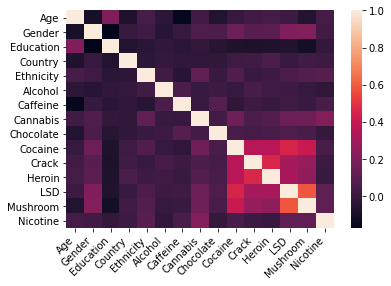

In [248]:
# Let's plot a heatmap to understand the above table
ax = sns.heatmap(
  correlation)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

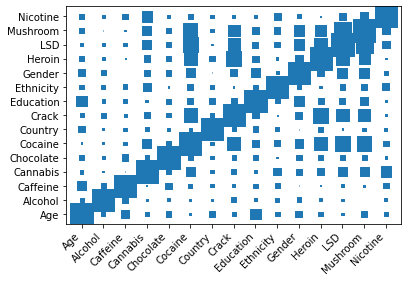

In [249]:
# Heatmap where the size of square is directly propotional to absolute value of correlation.
# Code Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    


corr = pd.melt(correlation.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs())


Thes size of the boxes represents how much two columns are correlated with each other.We can see that the largest boxes are on a diagnol, which makes sense as the correlation of a attribute with itself would be the highest(1). We can see from the heatmap,that illegal drugs have positive correlated to other illegal drugs. Cannabis is positively correlated with Cocaine, Mushroom and LSD.

After performing Chi-Square Independence Test and finding Pearson Correlation, we can coclude that Cannabis has a positive effect on consumption of other drugs like crack, heroin,LSD.

## Hypothesis 2
In 3 countries who top alcohol consumption, majority of the heavy drinkers are whites.

In [250]:
intermediate_df.sort_values(by='Alcohol_consumption_per_person_yearly(ltr)',ascending=False)
intermediate_df.head(3)

,Country,Alcohol_consumption_per_person_yearly(ltr)
2,Ireland,13.0
4,United Kingdom,11.4
3,New Zealand,10.7


Now we know that Ireland, United Kingdom and New Zealand are top 3 alcohol consuming countries per capita. Lets find the regular consumer of alcohol in these countries

In [0]:
top_alcohol_consumption = df[df['Country'].isin(['Ireland','United Kingdom','New Zealand'])]

In [0]:
# Counting people who have consumed alcohol in the past week
top_alcohol_consumption1= top_alcohol_consumption[top_alcohol_consumption['Alcohol'].isin(['Used in Last Week', 'Used in Last Day'])]

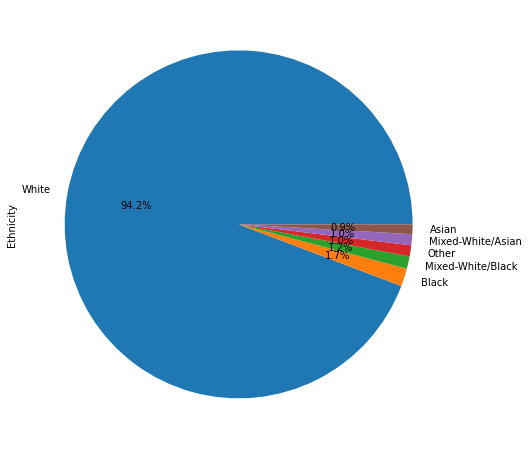

In [253]:
value_percentage_chart(top_alcohol_consumption1,'Ethnicity')

We can see that more than 94% of the regular consumer of alcohol are whites.
So Hypothesis 2 is true.

We have categorical values instead of continuous values for age as well as consumption of drugs. So I changed the categorical values into ordinal values to perform analysis.

In [0]:
drug_dict_new = {'Never Used':1,'Used over a Decade Ago':2,'Used in Last Decade':3, 'Used in Last Year':4,'Used in Last Month':5,'Used in Last Week':6,'Used in Last Day':7}
age_dict_new={'18-24':1,'25-34':2,'35-44':3,'45-54':4,'55-64':5,'65+':6}

In [0]:
df['Age'].replace(age_dict_new,inplace = True)

In [0]:
# for x,y in zip(['Age','Al'])
replace_val('Age',age_dict_new)

In [0]:
replace_val('Alcohol',drug_dict_new)

In [106]:
df.groupby(['Country'])['Alcohol'].mean()

Country
Australia              5.648148
Canada                 5.160920
New Zealand            5.600000
Other                  5.652542
Republic of Ireland    5.150000
UK                     5.744253
USA                    5.517056
Name: Alcohol, dtype: float64

In [0]:
df1 = df[df['Alcohol'] != 'Never Used']

In [0]:
df1.groupby(['Country'])['Age'].mean()

Country
Australia              2.074074
Canada                 2.511905
New Zealand            1.600000
Other                  1.921739
Republic of Ireland    2.210526
UK                     2.719727
USA                    1.758182
Name: Age, dtype: float64

## Hypothesis 3:
People who consume nicotine, also consume alcohol regularly.

In [0]:
top_nicotine_consumption = df[df['Nicotine'].isin(['Used in Last Week', 'Used in Last Day'])]

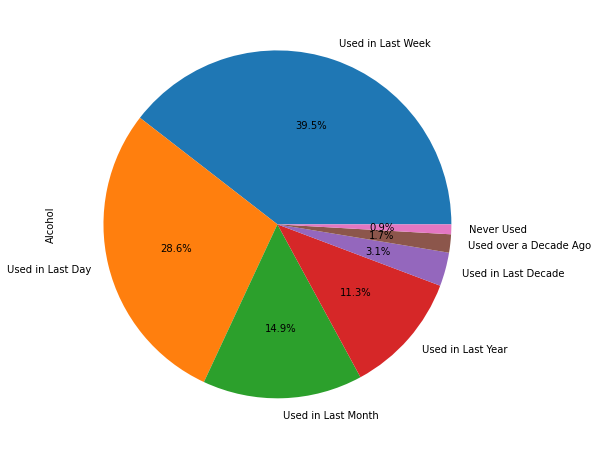

In [255]:
value_percentage_chart(top_nicotine_consumption, 'Alcohol')

We can see that, majority (almost 70%) of people who consume nicotine regulary, also consume alcohol regularly.

Hence Hypothesis 3 holds true.